In [5]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [13]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'  
train_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\data_train'                            
test_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\data_test'                         

# Define ratio for train-test split
split_ratio = 0.8  # 80% for training, 20% for testing

# Create directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Split images into train and test directories
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        category_images = [f for f in os.listdir(category_dir) if f.endswith('.jpg') or f.endswith('.png')]
        num_images = len(category_images)
        train_count = int(split_ratio * num_images)
        
        # Shuffle the list of images
        np.random.shuffle(category_images)
        
        # Copy images to train directory
        for img in category_images[:train_count]:
            src_path = os.path.join(category_dir, img)
            dst_path = os.path.join(train_dir, category, img)
            if not os.path.exists(os.path.join(train_dir, category)):
                os.makedirs(os.path.join(train_dir, category))
            shutil.copyfile(src_path, dst_path)
        
        # Copy images to test directory
        for img in category_images[train_count:]:
            src_path = os.path.join(category_dir, img)
            dst_path = os.path.join(test_dir, category, img)
            if not os.path.exists(os.path.join(test_dir, category)):
                os.makedirs(os.path.join(test_dir, category))
            shutil.copyfile(src_path, dst_path)

print("Data split into train and test sets successfully!")



Data split into train and test sets successfully!


In [14]:
print(category_images)

['s0012_04655_0_0_1_0_1_03.png', 's0019_05738_0_0_1_0_0_01.png', 's0014_06995_0_0_1_2_1_02.png', 's0036_04267_1_0_1_0_1_01.png', 's0014_06939_0_1_1_2_0_01.png', 's0012_07831_0_0_1_1_0_02.png', 's0014_07079_0_0_1_2_1_02.png', 's0012_04568_0_0_1_2_1_03.png', 's0014_07549_0_0_1_2_1_02.png', 's0012_07662_0_0_1_1_0_02.png', 's0012_07844_0_0_1_1_0_02.png', 's0014_07724_0_0_1_1_0_02.png', 's0036_02840_1_0_1_0_0_01.png', 's0012_04925_0_0_1_2_1_03.png', 's0012_07846_0_0_1_1_0_02.png', 's0014_08354_0_0_1_1_1_02.png', 's0012_07609_0_1_1_2_1_01.png', 's0012_07891_0_0_1_1_0_02.png', 's0001_03060_0_1_1_2_0_01.png', 's0019_06096_0_0_1_0_0_01.png', 's0001_02888_0_1_1_0_0_01.png', 's0014_06989_0_0_1_2_1_02.png', 's0014_07008_0_0_1_2_1_02.png', 's0034_00631_0_0_1_0_0_02.png', 's0001_03005_0_1_1_2_0_01.png', 's0001_02631_0_1_1_2_0_01.png', 's0001_02926_0_1_1_2_0_01.png', 's0012_07598_0_1_1_2_0_01.png', 's0014_08244_0_0_1_1_1_02.png', 's0036_02619_1_0_1_0_0_01.png', 's0012_04929_0_0_1_2_1_03.png', 's0036_

Accuracy: 0.9975
Precision: 0.9975117924528303
Recall: 0.9975
F1-score: 0.997499639432875


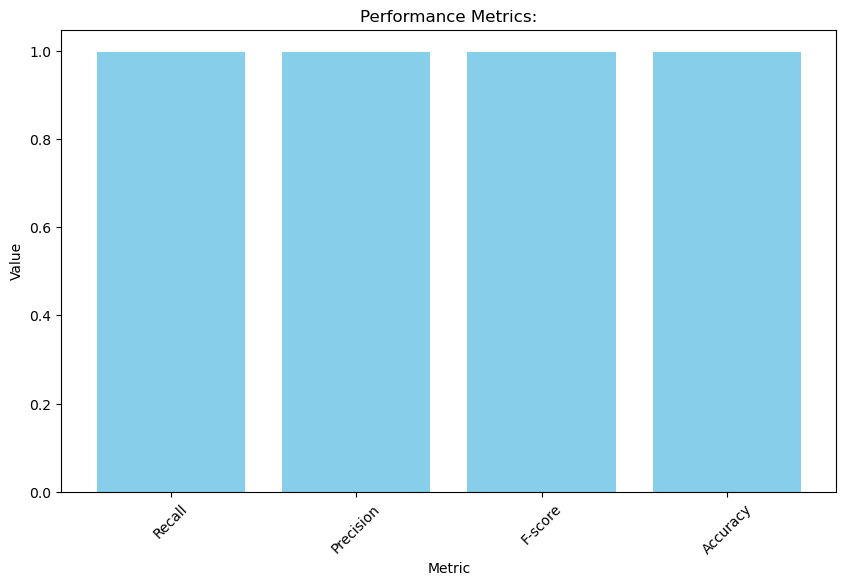

In [15]:
# Random Forest

import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

# Function to load and preprocess image data
def load_images_and_labels(data_dir):
    images = []
    labels = []
    
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                if image_file.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(label_dir, image_file)
                    image = imread(image_path)
                    image = resize(image, (100, 100))  # Resize the image to a fixed size
                    images.append(image.flatten())  # Flatten the image array
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# Path to the directory containing image data
data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'

# Load and preprocess the image data
images, labels = load_images_and_labels(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

# Calculating precision
rf_precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", rf_precision)

# Calculating recall
rf_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", rf_recall)

# Calculating F1-score
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", rf_f1)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy'],
                               'Value': [rf_recall, rf_precision, rf_f1, rf_accuracy]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics:')
plt.xticks(rotation=45)
plt.show()

Accuracy: 0.987
Precision: 0.9870032027770762
Recall: 0.987
F1-score: 0.9870006123526871


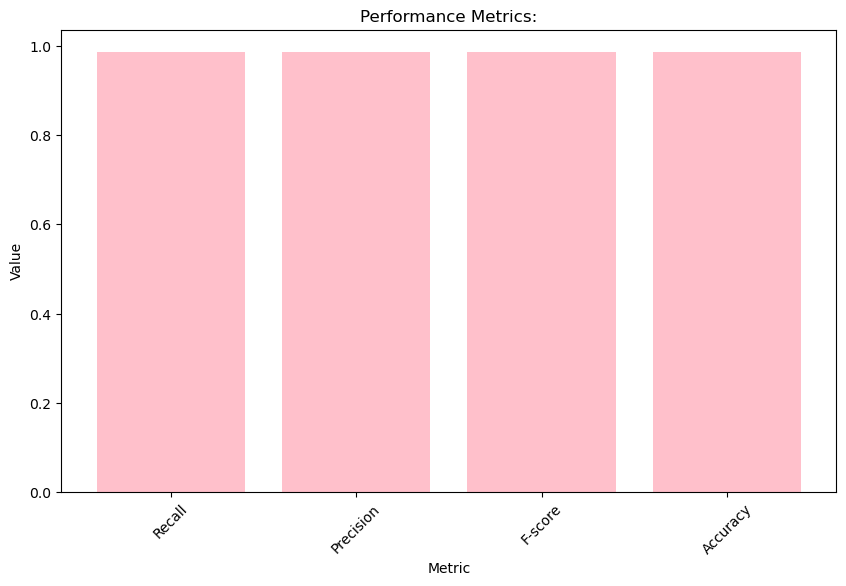

In [16]:
# Decision Tree

import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

# Function to load and preprocess image data
def load_images_and_labels(data_dir):
    images = []
    labels = []
    
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                if image_file.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(label_dir, image_file)
                    image = imread(image_path)
                    image = resize(image, (100, 100))  # Resize the image to a fixed size
                    images.append(image.flatten())  # Flatten the image array
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# Path to the directory containing image data
data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'

# Load and preprocess the image data
images, labels = load_images_and_labels(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Create and train the Random Forest classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

# Calculating precision
dt_precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", dt_precision)

# Calculating recall
dt_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", dt_recall)

# Calculating F1-score
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", dt_f1)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy'],
                               'Value': [dt_recall, dt_precision, dt_f1, dt_accuracy]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='pink')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics:')
plt.xticks(rotation=45)
plt.show()

Accuracy: 0.999
Precision: 0.9990020964360588
Recall: 0.999
F1-score: 0.9990000471040528


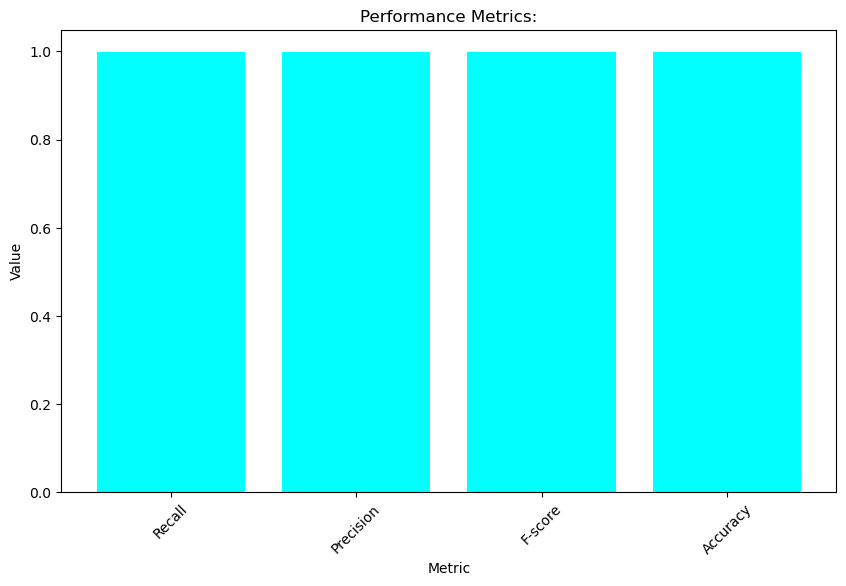

In [6]:
# SVM

import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

# Function to load and preprocess image data
def load_images_and_labels(data_dir):
    images = []
    labels = []
    
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                if image_file.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(label_dir, image_file)
                    image = imread(image_path)
                    image = resize(image, (100, 100))  # Resize the image to a fixed size
                    images.append(image.flatten())  # Flatten the image array
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# Path to the directory containing image data
data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'

# Load and preprocess the image data
images, labels = load_images_and_labels(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Training the SVM model
model = SVC(kernel='linear')  
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#: Evaluating the model
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

# Calculating precision
svm_precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", svm_precision)

# Calculating recall
svm_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", svm_recall)

# Calculating F1-score
svm_f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", svm_f1)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy'],
                               'Value': [svm_recall, svm_precision, svm_f1, svm_accuracy]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='cyan')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics:')
plt.xticks(rotation=45)
plt.show()

Found 4000 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.5904 - loss: 0.6970 - val_accuracy: 0.7109 - val_loss: 0.5446
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.8030 - loss: 0.4935 - val_accuracy: 0.8542 - val_loss: 0.4131
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8438 - loss: 0.3980 - val_accuracy: 0.9115 - val_loss: 0.2985
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8836 - loss: 0.3056 - val_accuracy: 0.9271 - val_loss: 0.2718
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9080 - loss: 0.3016 - val_accuracy: 0.9219 - val_loss: 0.2412
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9258 - loss: 0.2441 - val_accuracy: 0.9505 - val_loss: 0.2046
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9452 - loss: 0.2111 - val_accuracy: 0.9401 - val_loss: 0.2021
Epoch 8/10
12/12 ━━━━━━

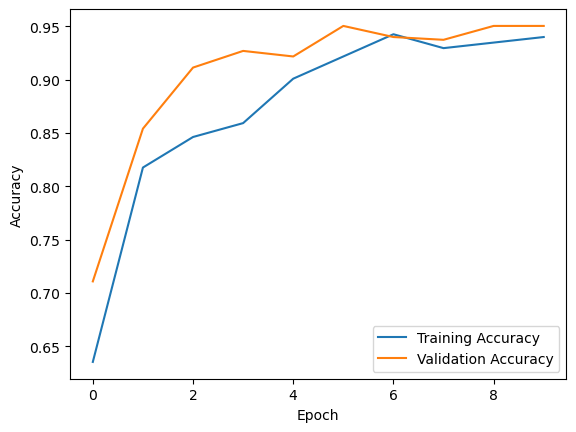

Accuracy: [0.6354166865348816, 0.8177083134651184, 0.8463541865348816, 0.859375, 0.9010416865348816, 0.921875, 0.9427083134651184, 0.9296875, 0.9348958134651184, 0.9401041865348816]
Average Accuracy: 0.8729166686534882
Precision: 0.9990020964360588
Recall: 0.999
F1-score: 0.9990000471040528


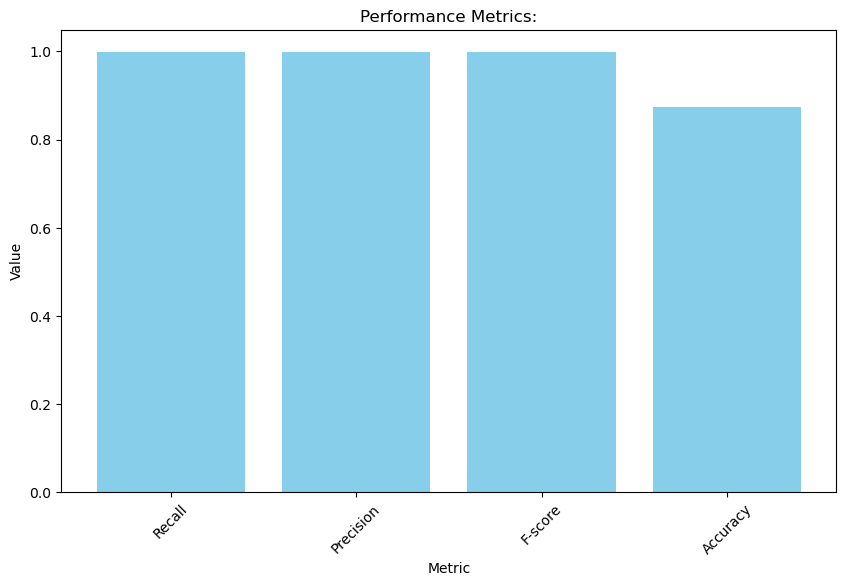

In [25]:
# ANN
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define paths to your original dataset directory and the directory where you want to store the split data
original_data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'
base_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset\Open_Eyes'  # This will be the base directory for the training and validation data

# Create base directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define subdirectories for training and validation data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create subdirectories for training and validation data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define the percentage of data to use for validation
validation_split = 0.2

# Iterate through the original dataset directory
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    if os.path.isdir(class_dir):
        # Create subdirectories for each class in the training and validation directories
        train_class_dir = os.path.join(train_dir, class_name)
        validation_class_dir = os.path.join(validation_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(validation_class_dir, exist_ok=True)
        
        # Get list of all image files in the class directory
        images = [img for img in os.listdir(class_dir) if img.endswith('.jpg') or img.endswith('.png')]
        
        # Randomly shuffle the list of images
        random.shuffle(images)
        
        # Calculate the number of validation images for this class
        num_validation_images = int(len(images) * validation_split)
        
        # Move validation images to the validation directory
        for img in images[:num_validation_images]:
            src = os.path.join(class_dir, img)
            dst = os.path.join(validation_class_dir, img)
            shutil.copy(src, dst)
        
        # Move training images to the training directory
        for img in images[num_validation_images:]:
            src = os.path.join(class_dir, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)

# Data preparation using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

# Define the architecture of the ANN
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the images
    Dense(128, activation='relu'),     # Fully connected layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),      # Fully connected layer with 64 neurons and ReLU activation
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 320,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 320
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Accuracy:", history.history['accuracy'])


average_accuracy_ann = np.mean(history.history['accuracy'])
print("Average Accuracy:", average_accuracy_ann)

# Calculating precision
ann_precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", ann_precision)

# Calculating recall
ann_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:",ann_recall)

# Calculating F1-score
ann_f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:",ann_f1)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy'],
                               'Value': [ann_recall, ann_precision, ann_f1, average_accuracy_ann]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics:')
plt.xticks(rotation=45)
plt.show()


Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/10


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.5708 - loss: 0.6760 - val_accuracy: 0.5573 - val_loss: 0.6500
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.7239 - loss: 0.5650 - val_accuracy: 0.7031 - val_loss: 0.4909
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8064 - loss: 0.4614 - val_accuracy: 0.9245 - val_loss: 0.3729
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7660 - loss: 0.4413 - val_accuracy: 0.8672 - val_loss: 0.3312
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8036 - loss: 0.4291 - val_accuracy: 0.8307 - val_loss: 0.3183
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8695 - loss: 0.3019 - val_accuracy: 0.9271 - val_loss: 0.2802
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8388 - loss: 0.3801 - val_accuracy: 0.9167 - val_loss: 0.2893
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8454 - loss: 0.3457 - val_accuracy: 0.8984 - val_lo

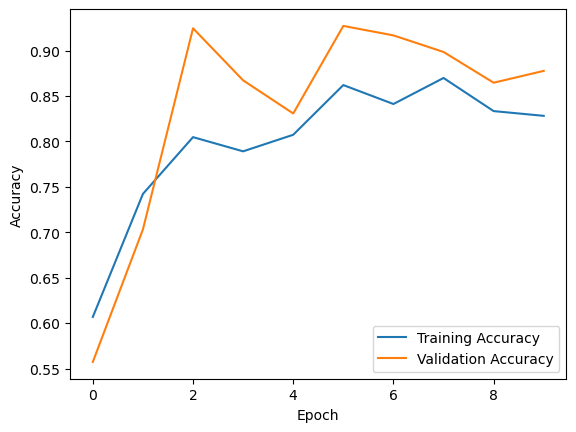

Accuracy: [0.6067708134651184, 0.7421875, 0.8046875, 0.7890625, 0.8072916865348816, 0.8619791865348816, 0.8411458134651184, 0.8697916865348816, 0.8333333134651184, 0.828125]
Average Accuracy: 0.80625
Precision: 0.9990020964360588
Recall: 0.999
F1-score: 0.9990000471040528


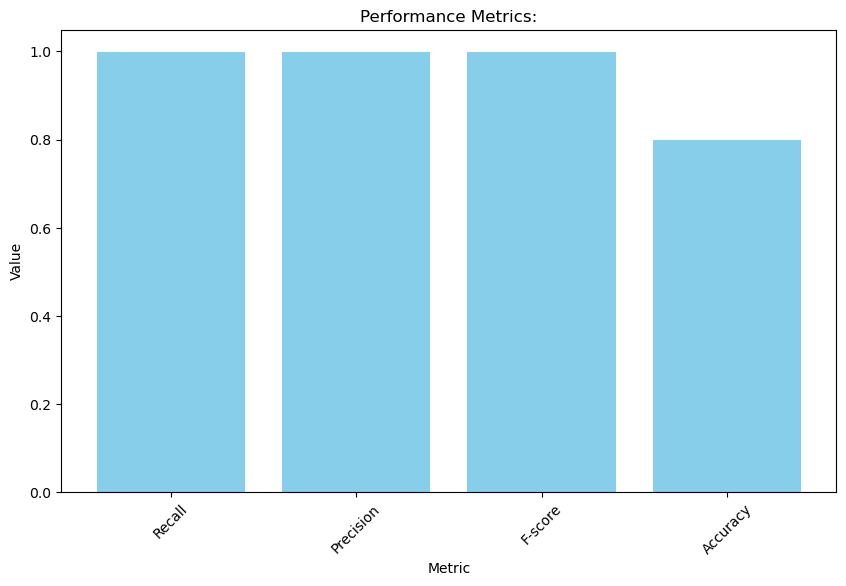

In [30]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define paths to your original dataset directory and the directory where you want to store the split data
original_data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset'
base_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\dataset\Open_Eyes'  # This will be the base directory for the training and validation data

# Create base directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define subdirectories for training and validation data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create subdirectories for training and validation data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define the percentage of data to use for validation
validation_split = 0.2

# Iterate through the original dataset directory
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    if os.path.isdir(class_dir):
        # Create subdirectories for each class in the training and validation directories
        train_class_dir = os.path.join(train_dir, class_name)
        validation_class_dir = os.path.join(validation_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(validation_class_dir, exist_ok=True)
        
        # Get list of all image files in the class directory
        images = [img for img in os.listdir(class_dir) if img.endswith('.jpg') or img.endswith('.png')]
        
        # Randomly shuffle the list of images
        random.shuffle(images)
        
        # Calculate the number of validation images for this class
        num_validation_images = int(len(images) * validation_split)
        
        # Move validation images to the validation directory
        for img in images[:num_validation_images]:
            src = os.path.join(class_dir, img)
            dst = os.path.join(validation_class_dir, img)
            shutil.copy(src, dst)
        
        # Move training images to the training directory
        for img in images[num_validation_images:]:
            src = os.path.join(class_dir, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)

# Data preparation using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)
# Create a Sequential model
model = Sequential()

# Flatten the output and add a Dropout layer
model.add(Flatten())
model.add(Dropout(0.5))

# Add Dense layers with ReLU activation and a Softmax output layer
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Compile the model with categorical cross-entropy loss, accuracy metric, and Adam optimizer
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

# Print the model summary
#model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 320,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 320
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Accuracy:", history.history['accuracy'])

average_accuracy_lstm = np.mean(history.history['accuracy'])
print("Average Accuracy:", average_accuracy_ann)

# Calculating precision
lstm_precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", lstm_precision)

# Calculating recall
lstm_recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:",lstm_recall)

# Calculating F1-score
lstm_f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:",lstm_f1)

# Create a DataFrame for the performance metrics
performance_df = pd.DataFrame({'Metric': ['Recall', 'Precision', 'F-score', 'Accuracy'],
                               'Value': [lstm_recall, lstm_precision, lstm_f1, average_accuracy_lstm]})

# Plot the performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Metric'], performance_df['Value'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics:')
plt.xticks(rotation=45)
plt.show()


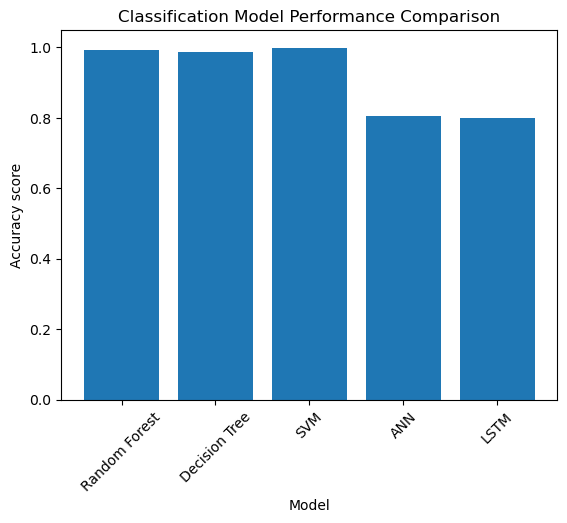

In [31]:
# Bar graph to show the best model for classification Task
models = ['Random Forest', 'Decision Tree', 'SVM', 'ANN', 'LSTM' ]
acc = [rf_accuracy, dt_accuracy, svm_accuracy, average_accuracy_ann, average_accuracy_lstm]
plt.bar(models, acc)
plt.title('Classification Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.xticks(rotation=45)
plt.show()

# Drowsiness Detection

In [1]:
import os

input_files = []
for dirname, _, filenames in os.walk('eyes_dataset'):
    for filename in filenames:
        input_files.append(os.path.join(dirname, filename))

print(input_files)


['eyes_dataset\\train\\Closed_Eyes\\s0001_00001_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00002_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00003_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00004_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00005_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00006_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00007_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00008_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00009_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00011_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00013_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00014_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00015_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00016_0_0_0_0_0_01.png', 'eyes_dataset\\train\\Closed_Eyes\\s0001_00017_0_0_0_0_0_01.png', 'eyes_dat

In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [19]:
import numpy as np
from tqdm import tqdm
from glob import glob
from PIL import Image

data_dir = r'C:\Users\KIIT\OneDrive\Desktop\TTL project\eyes_dataset'  # Data directory path
train_dir = os.path.join(data_dir, 'train')                            # Train directory path
test_dir = os.path.join(data_dir, 'test')                              # Test directory path

X = []
Y = []

# Loop for Open_Eyes images
for i in tqdm(glob(os.path.join(train_dir, 'Open_Eyes', '*'))):
    temp = np.array(Image.open(i).resize((32,32)))
    X.append(temp)
    Y.append(1)
    
# Loop for Closed_Eyes images
for i in tqdm(glob(os.path.join(train_dir, 'Closed_Eyes', '*'))):
    temp = np.array(Image.open(i).resize((32,32)))
    X.append(temp)
    Y.append(0)


100%|██████████| 2000/2000 [00:00<00:00, 2388.91it/s]


In [20]:
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

In [5]:
X.shape

(4000, 32, 32)

In [6]:
X = np.expand_dims(X,-1)

In [7]:
X.shape

(4000, 32, 32, 1)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten

model = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(32, 32, 1)),
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),

    Flatten(),
    Dense(units=256, activation='relu', use_bias=False),
    BatchNormalization(),

    Dense(units=128, use_bias=False, activation='relu'),

    Dense(units=84, use_bias=False, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(32, 32, 1)),  # Modify input_shape
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False),
    BatchNormalization(),
    MaxPooling2D(strides=2),
    Dropout(0.3),
    Flatten(),
    Dense(units=256, activation='relu', use_bias=False),
    BatchNormalization(),
    Dense(units=128, use_bias=False, activation='relu'),
    Dense(units=84, use_bias=False, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 64)       │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,285 (1.49 MB)

 Trainable params: 388,413 (1.48 MB)

 Non-trainable params: 872 (3.41 KB)

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [67]:
import h5py
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_accuracy',  # Change monitoring metric to validation accuracy
    mode='max',  # Change mode to maximize validation accuracy
    save_best_only=True,
    verbose=1
)

model.fit(x_train, y_train, validation_split=0.33, epochs=30, batch_size=32, callbacks=[callback])  # Pass the callback as a list


Epoch 1/30
55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9938 - loss: 0.0258
Epoch 1: val_accuracy improved from -inf to 0.49153, saving model to bestModel.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9938 - loss: 0.0258 - val_accuracy: 0.4915 - val_loss: 4.3765
Epoch 2/30
55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9887 - loss: 0.0353
Epoch 2: val_accuracy did not improve from 0.49153
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.4915 - val_loss: 42.4315
Epoch 3/30
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9931 - loss: 0.0178
Epoch 3: val_accuracy did not improve from 0.49153
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9932 - loss: 0.0184 - val_accuracy: 0.4915 - val_loss: 31.6231
Epoch 4/30
55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9759 - loss: 0.0753
Epoch 4: val_accuracy did not improve from 0.49153
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9761 - loss: 0.075

In [68]:
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9977 - loss: 0.0056


[0.011543633416295052, 0.9962121248245239]

In [69]:
from keras.models import load_model
best_model = load_model('best_model.keras')
best_model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.3203e-04


[0.0003334612993057817, 1.0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


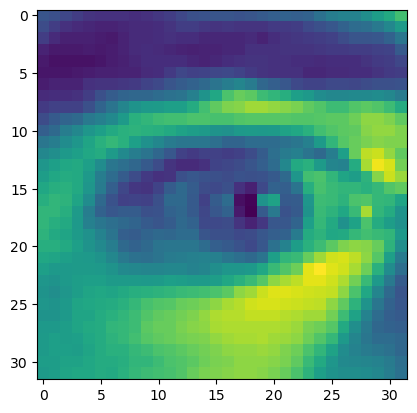

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


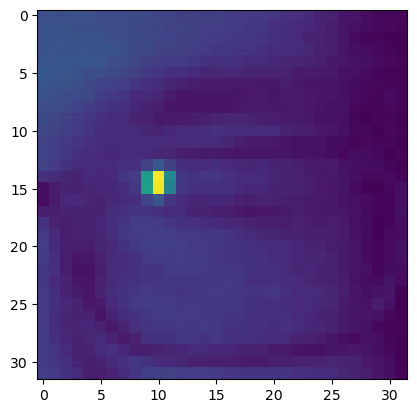

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


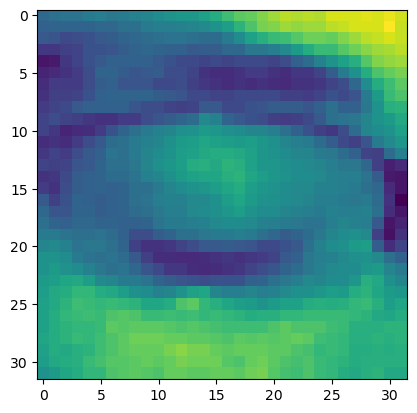

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


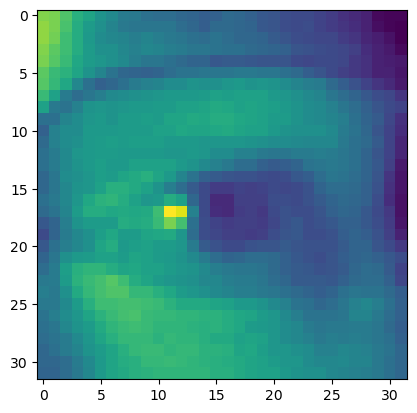

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


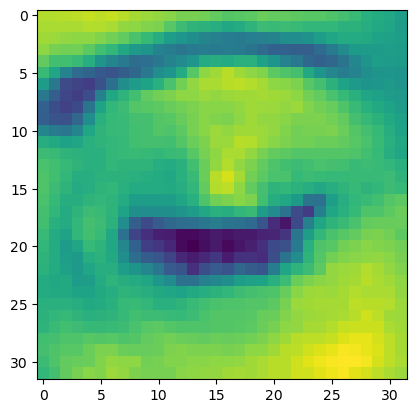

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


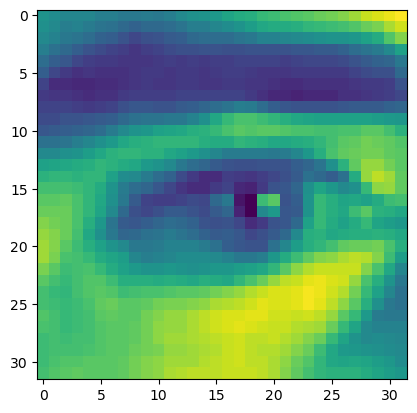

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


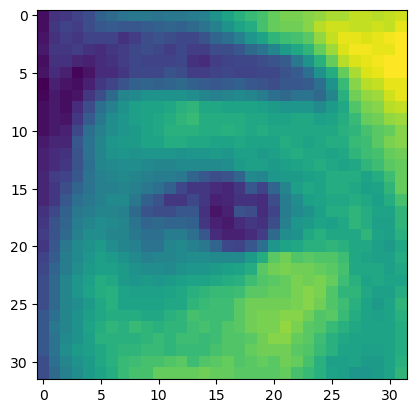

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


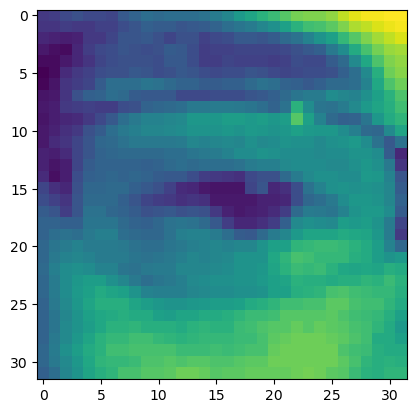

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


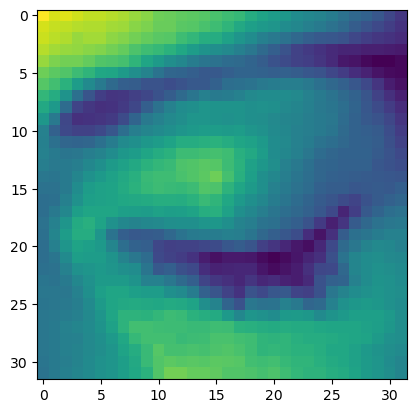

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


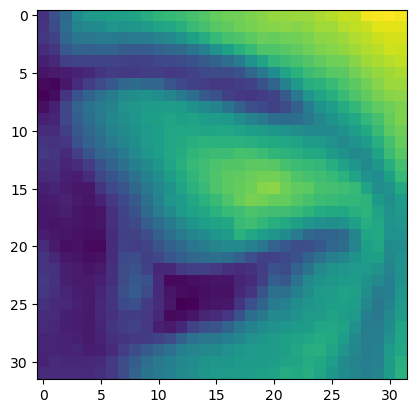

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


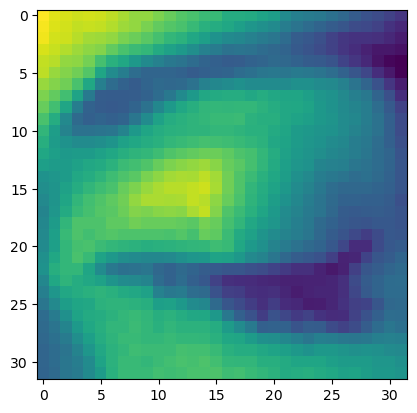

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


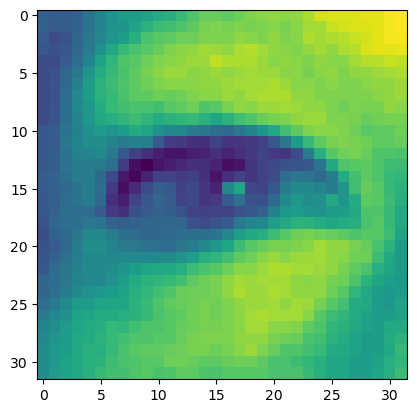

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


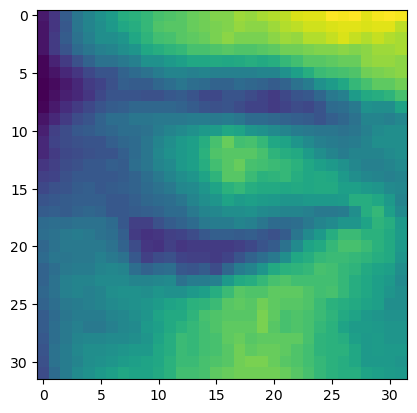

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


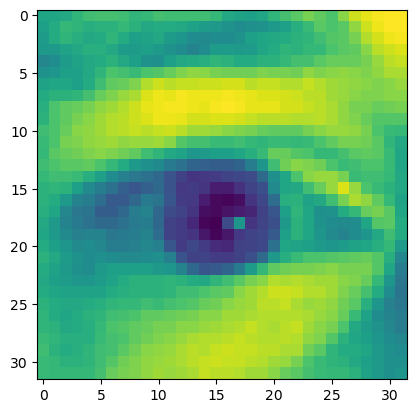

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


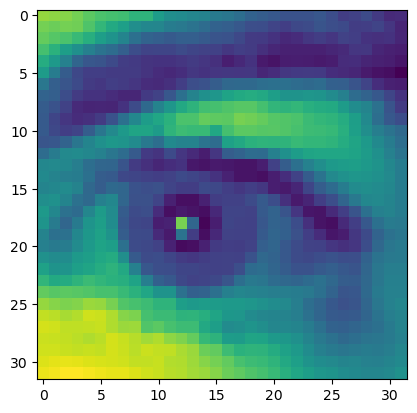

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


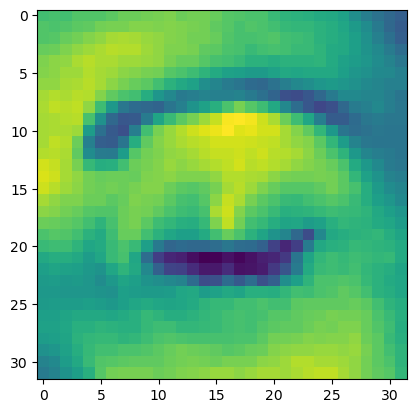

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


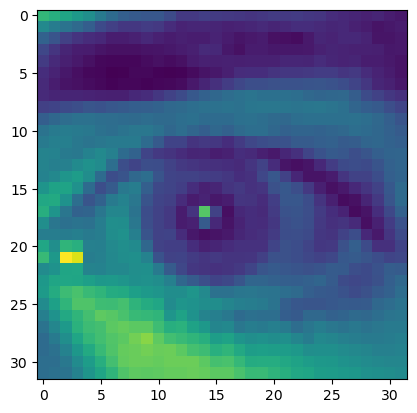

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


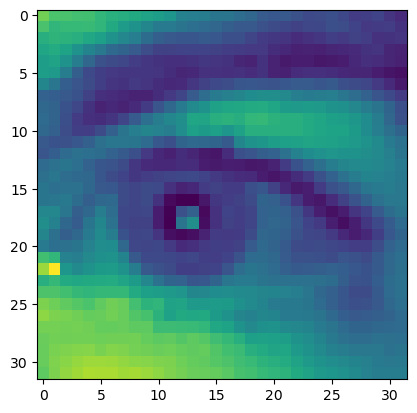

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


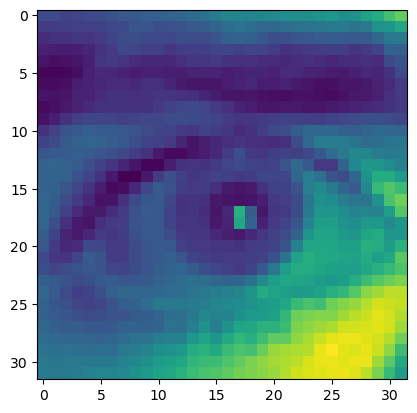

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


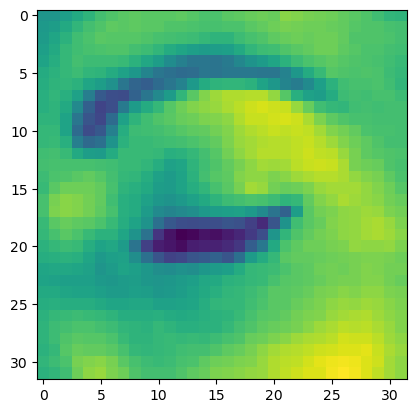

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


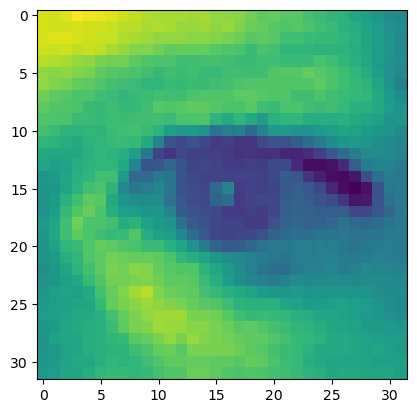

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


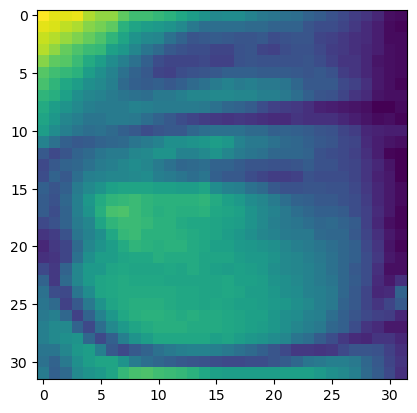

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


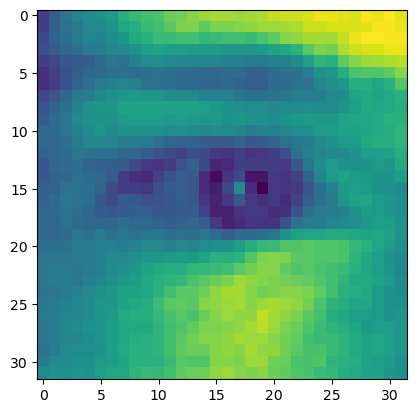

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


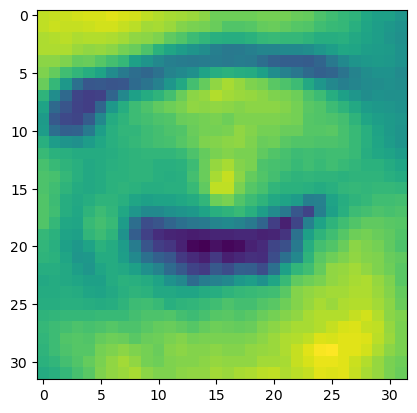

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


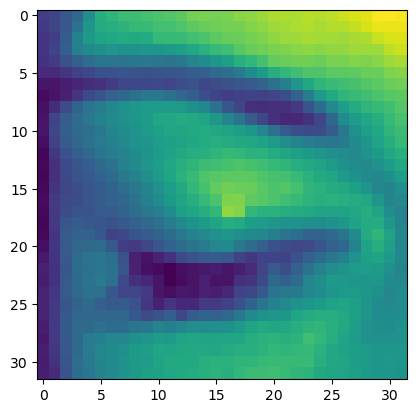

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


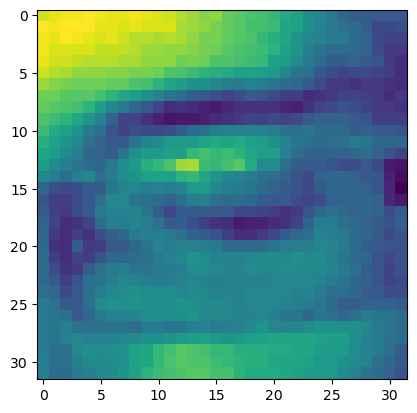

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


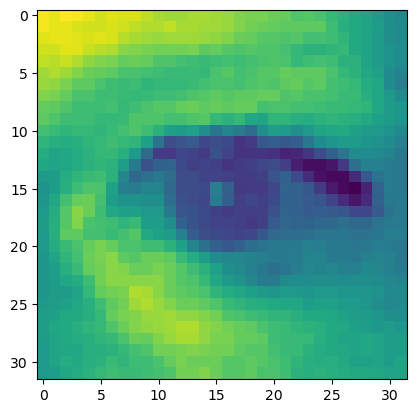

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


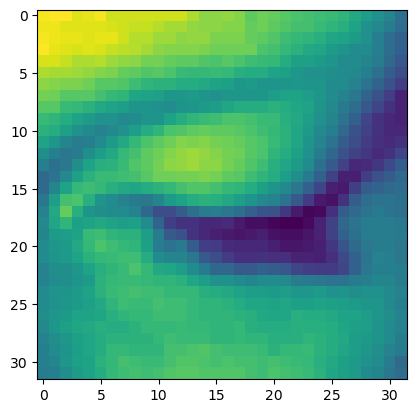

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


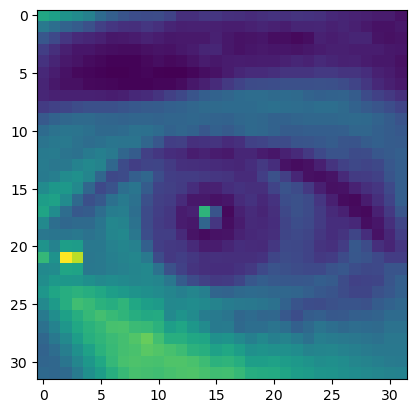

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


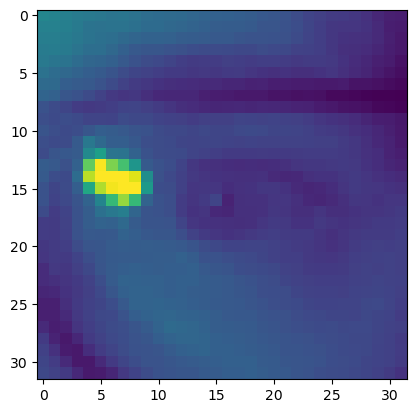

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


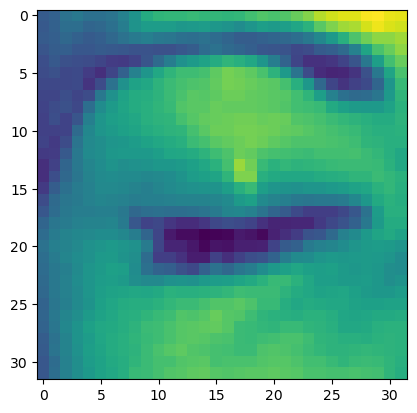

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


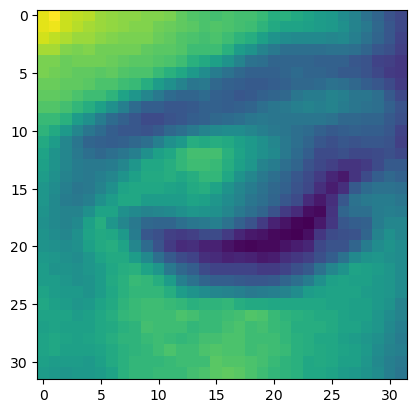

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


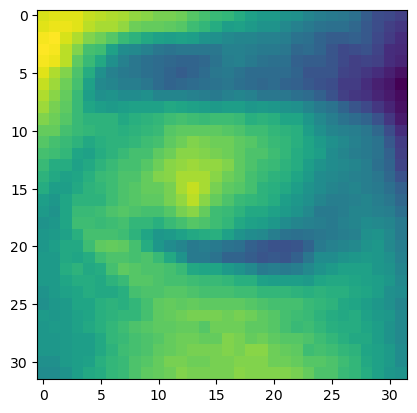

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


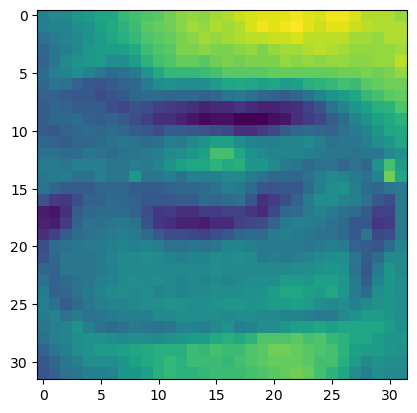

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


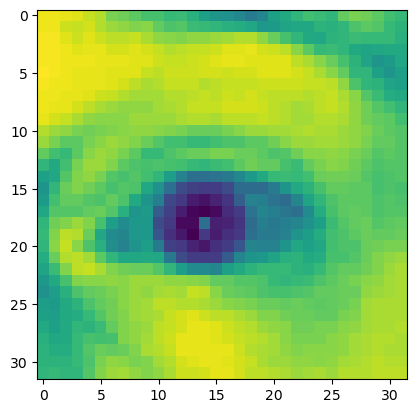

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


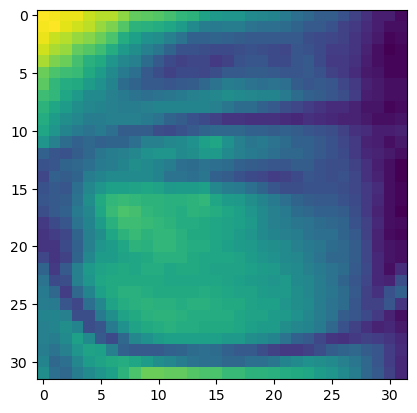

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


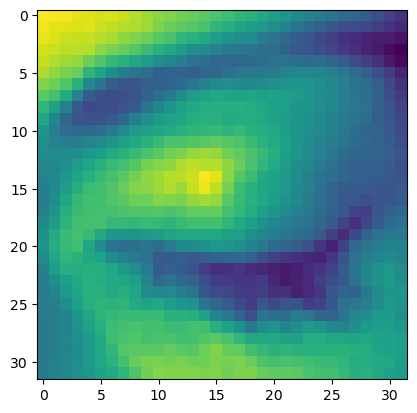

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


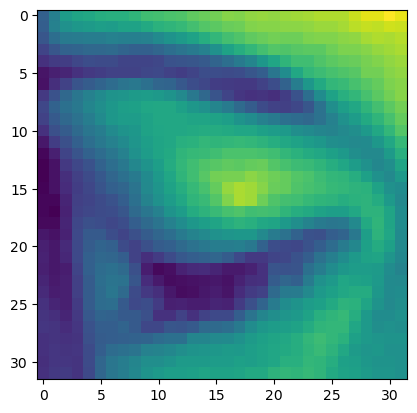

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


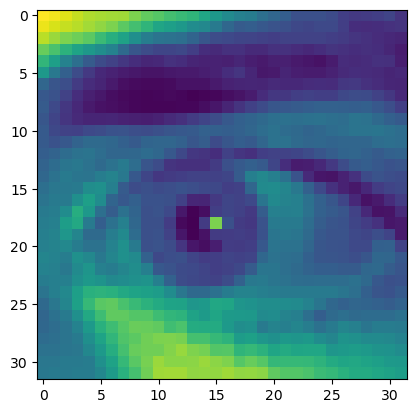

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


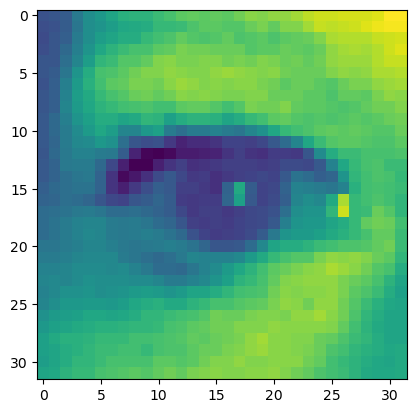

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


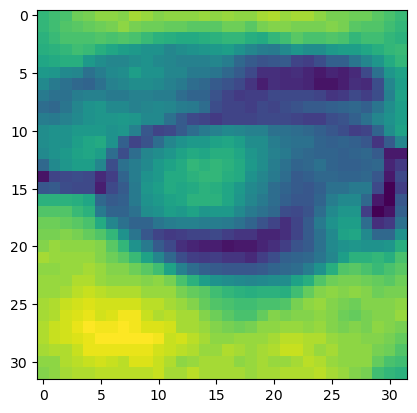

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


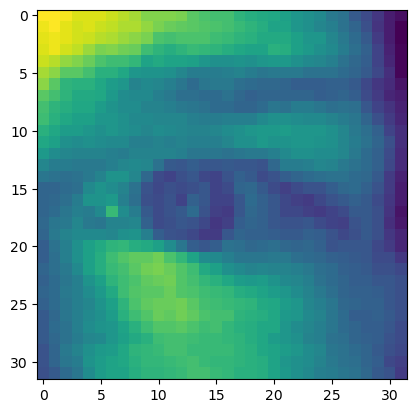

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


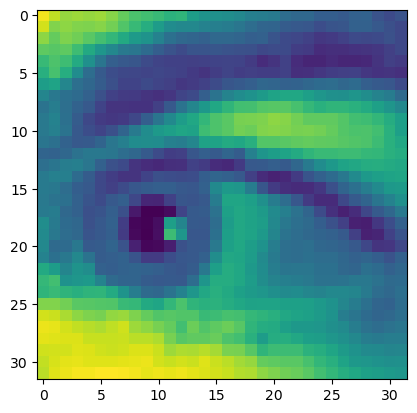

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


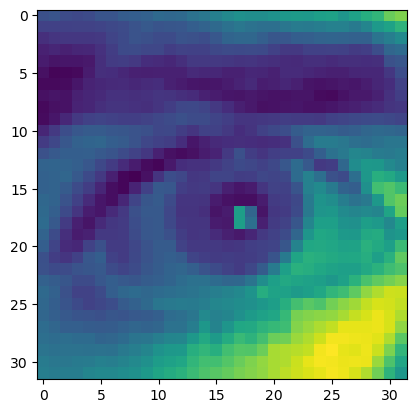

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


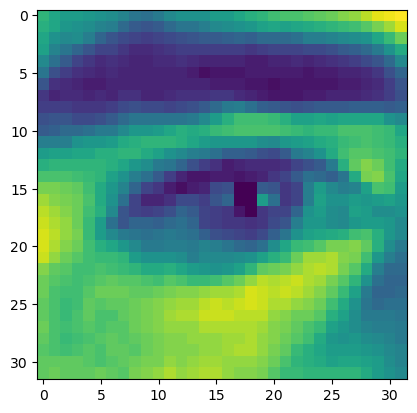

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


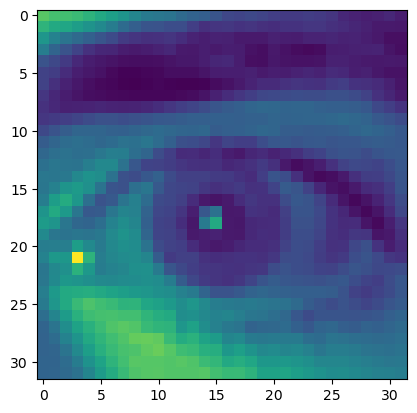

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


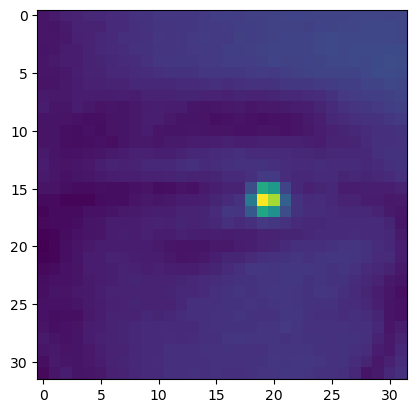

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


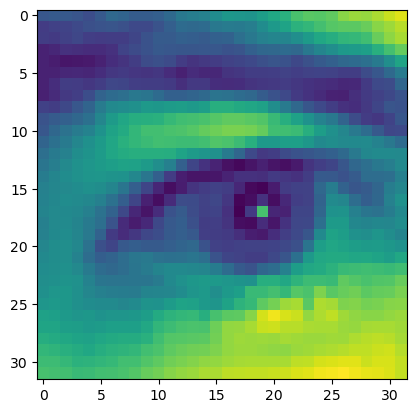

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


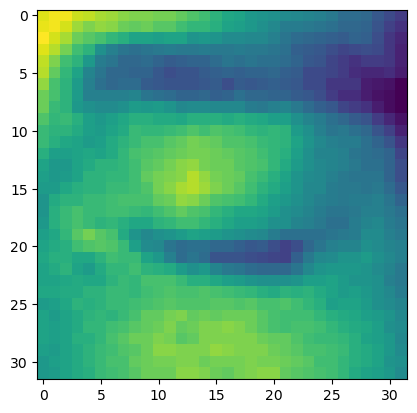

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


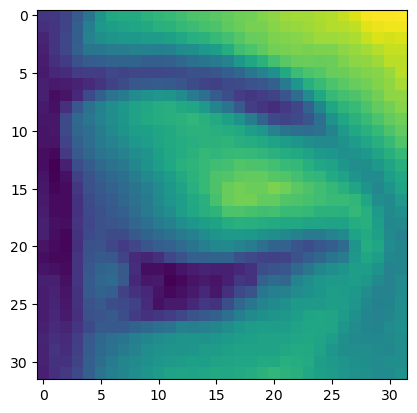

Closed


In [34]:
for i in x_test[100:150]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0.5, 25.722222222222214, 'Actual')

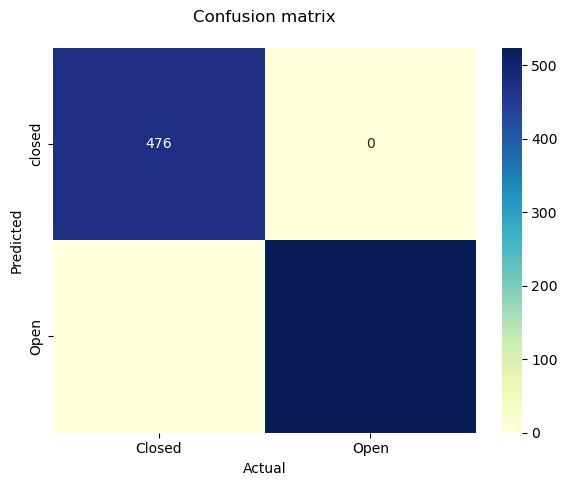

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")
